# CHI crime: An Analysis of Homicides and Non-Fatal Shootings in Chicago

### PROJECT TOPIC 

Much has been written about the frequency of shootings and homicides in Chicago. Most of the analyses and attempted interventions have focused on reducing the overall prevalence of guns and the raw number of shootings — with only modest success. The question I will address instead is, what can we learn by analyzing the nature of the shootings that have occurred over the past few decades? Can we build a good predictive model that will tell us **who** is likely to be killed in a shooting, **where** and **when**? If so, then maybe we could imagine interventions that specifically address the lethality of shootings, as opposed to their prevalence.

My project aims to create a classifier model that predicts whether or not someone victimized in a shooting will be killed.

### DATA

To train and test my model, I will use a dataset containing fatal and non-fatal shooting victimizations in the City of Chicago from 1991 to the present day (March, 2025).

This dataset contains individual-level homicide and non-fatal shooting victimizations, including homicide data from 1991 to the present, and non-fatal shooting data from 2010 to the present (2010 is the earliest available year for shooting data).

Each row represents a single victimization, i.e., a unique event when an individual became the victim of a homicide or non-fatal shooting.

Data source:

City of Chicago. (2025). *Violence Reduction - Victims of Homicides and Non-Fatal Shootings* (Updated on February 24, 2025) [Data set]. https://data.cityofchicago.org/Public-Safety/Violence-Reduction-Victims-of-Homicides-and-Non-Fa/gumc-mgzr/about_data 

In [59]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [401]:
df = pd.read_csv("Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings.csv")

/var/folders/tn/lrj782gn5yd6plp647hjxv7c0000gq/T/ipykernel_30230/3898857932.py:1: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings.csv")


First I'm going to convert the columns to the most appropriate datatypes (so I don't just end up with a bunch of "object" types) and take a high-level look at  the data:

In [402]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61140 entries, 0 to 61139
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CASE_NUMBER                   61140 non-null  string 
 1   DATE                          61140 non-null  string 
 2   BLOCK                         61140 non-null  string 
 3   VICTIMIZATION_PRIMARY         61140 non-null  string 
 4   INCIDENT_PRIMARY              61140 non-null  string 
 5   GUNSHOT_INJURY_I              61140 non-null  string 
 6   UNIQUE_ID                     61140 non-null  string 
 7   ZIP_CODE                      61136 non-null  Int64  
 8   WARD                          61136 non-null  Int64  
 9   COMMUNITY_AREA                61136 non-null  string 
 10  STREET_OUTREACH_ORGANIZATION  44630 non-null  string 
 11  AREA                          61136 non-null  Int64  
 12  DISTRICT                      61136 non-null  Int64  
 13  B

In [403]:
df.head()

,CASE_NUMBER,DATE,BLOCK,VICTIMIZATION_PRIMARY,INCIDENT_PRIMARY,GUNSHOT_INJURY_I,UNIQUE_ID,ZIP_CODE,WARD,COMMUNITY_AREA,...,MONTH,DAY_OF_WEEK,HOUR,LOCATION_DESCRIPTION,STATE_HOUSE_DISTRICT,STATE_SENATE_DISTRICT,UPDATED,LATITUDE,LONGITUDE,LOCATION
0,JF167335,03/08/2022 03:27:00 PM,6000 N KENMORE AVE,HOMICIDE,HOMICIDE,NO,HOM-JF167335-#1,60660,48,EDGEWATER,...,3,3,15,APARTMENT,14,7,02/24/2023 05:55:43 AM,41.99057,-87.657,POINT (-87.657 41.9905705)
1,JG148375,02/11/2023 02:30:00 AM,8400 S WABASH AVE,HOMICIDE,HOMICIDE,YES,HOM-JG148375-#1,60619,6,CHATHAM,...,2,7,2,ALLEY,34,17,02/12/2023 05:09:11 AM,41.7399,-87.62286,POINT (-87.62286 41.7399005)
2,JD438266,11/21/2020 10:15:00 PM,7900 S BRANDON AVE,HOMICIDE,HOMICIDE,YES,HOM-JD438266-#1,60617,7,SOUTH CHICAGO,...,11,7,22,STREET,25,13,01/30/2025 05:49:40 AM,41.750567,-87.547249,POINT (-87.547249058699 41.750566904142)
3,JH317789,06/23/2024 08:11:00 AM,12300 S HALSTED ST,HOMICIDE,HOMICIDE,YES,HOM-JH317789-#1,60628,9,WEST PULLMAN,...,6,1,8,STREET,28,14,01/30/2025 05:40:06 AM,41.670653,-87.641779,POINT (-87.641779058699 41.670653095858)
4,JH317789,06/23/2024 08:11:00 AM,12300 S HALSTED ST,HOMICIDE,HOMICIDE,YES,HOM-JH317789-#2,60628,9,WEST PULLMAN,...,6,1,8,STREET,28,14,01/30/2025 05:40:14 AM,41.670653,-87.641779,POINT (-87.641779058699 41.670653095858)


In [404]:
df.isnull().sum()

CASE_NUMBER                         0
DATE                                0
BLOCK                               0
VICTIMIZATION_PRIMARY               0
INCIDENT_PRIMARY                    0
GUNSHOT_INJURY_I                    0
UNIQUE_ID                           0
ZIP_CODE                            4
WARD                                4
COMMUNITY_AREA                      4
STREET_OUTREACH_ORGANIZATION    16510
AREA                                4
DISTRICT                            4
BEAT                                4
AGE                                 0
SEX                                 0
RACE                                0
VICTIMIZATION_FBI_CD              332
INCIDENT_FBI_CD                     5
VICTIMIZATION_FBI_DESCR           335
INCIDENT_FBI_DESCR                  5
VICTIMIZATION_IUCR_CD               0
INCIDENT_IUCR_CD                    0
VICTIMIZATION_IUCR_SECONDARY     8431
INCIDENT_IUCR_SECONDARY          8114
HOMICIDE_VICTIM_FIRST_NAME      39579
HOMICIDE_VIC

The data is 61,140 rows with 38 columns, in a file that's 17.7 MB.

### DATA CLEANING

Some aspects of the data suggest necessary cleaning and prepping work ahead:

1. Most significantly, there's no clear target column. Fatal shootings are indicated by a value in the VICTIMIZATION_PRIMARY colunn of "HOMICIDE" alongside a GUNSHOT_INJURY_I value of "YES." Non-fatal shootings are indicated by any other values in VICTIMIZATION_PRIMARY. I will want look at just the shooting incidents and give a binary answer to "was this a homicide?" in a new column. Then I can delete all the redundant and extraneous crime classification columns. 

2. The fact that so many columns are of type "string" is going to be problematic. Some of these should be oridinal categoricals (such as "age," which is given as a range in this dataset), while others such as "sex" are non-ordinal. I need to change the dtypes to make the data more useful for analysis.

3. I  got a warning when importing the data that columns 25-27 have mixed data. Since those columns contain the victims' name, I think I can safely delete them.

4. There are is lof of redundant location and date/time information in columns that I need to simplify. For date, I need to extract the year into its own column. For location, I am going to retain only WARD, LATITUDE/LONGITUDE and policing BEAT.

5. While most of the null entries are in columns I can safely drop, there appear to be four samples with nulls in every location column. These entries will need to be dropped from the analysis. 

One last quirk about this dataset, which I know about from reading the description on the City of Chicago website: Entries from before the year 2010 are exclusively homicides, so I can't use them in my fatal vs. non-fatal analysis. 

I will start by dropping columns I know I don't need.

In [405]:
df = df.drop(columns=['CASE_NUMBER','BLOCK','INCIDENT_PRIMARY','UNIQUE_ID','ZIP_CODE','COMMUNITY_AREA','STREET_OUTREACH_ORGANIZATION','VICTIMIZATION_FBI_CD','INCIDENT_FBI_CD','VICTIMIZATION_FBI_DESCR','INCIDENT_FBI_DESCR','VICTIMIZATION_IUCR_CD','INCIDENT_IUCR_CD','VICTIMIZATION_IUCR_SECONDARY','INCIDENT_IUCR_SECONDARY','HOMICIDE_VICTIM_FIRST_NAME','HOMICIDE_VICTIM_MI','HOMICIDE_VICTIM_LAST_NAME','STATE_HOUSE_DISTRICT','STATE_SENATE_DISTRICT','UPDATED','LOCATION','AREA','DISTRICT'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61140 entries, 0 to 61139
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   61140 non-null  string 
 1   VICTIMIZATION_PRIMARY  61140 non-null  string 
 2   GUNSHOT_INJURY_I       61140 non-null  string 
 3   WARD                   61136 non-null  Int64  
 4   BEAT                   61136 non-null  Int64  
 5   AGE                    61140 non-null  string 
 6   SEX                    61140 non-null  string 
 7   RACE                   61140 non-null  string 
 8   MONTH                  61140 non-null  Int64  
 9   DAY_OF_WEEK            61140 non-null  Int64  
 10  HOUR                   61140 non-null  Int64  
 11  LOCATION_DESCRIPTION   61140 non-null  string 
 12  LATITUDE               61136 non-null  Float64
 13  LONGITUDE              61136 non-null  Float64
dtypes: Float64(2), Int64(5), string(7)
memory usage: 6.9 M

Now I want to look at just gun crimes since 2010.

In [406]:
# create new column with just 'YEAR' from 'DATE', drop DATE and then filter just records of shootings from 2010 and later
df['YEAR'] = df.DATE.apply(lambda x: int(x[6:10]))
df = df.query('YEAR >= 2010 and GUNSHOT_INJURY_I=="YES"')
df = df.drop(columns=['DATE', 'GUNSHOT_INJURY_I'])


I'm going to create my target column 'FATAL' by extracting the homicides.

In [407]:
# df.insert(0, 'FATAL')
df['FATAL'] = 0
df.loc[df['VICTIMIZATION_PRIMARY'] == 'HOMICIDE', 'FATAL'] = 1
df = df.drop(columns=['VICTIMIZATION_PRIMARY'])
# Insert FATAL as first column
df.insert(0, 'FATAL', df.pop('FATAL')) 


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47325 entries, 1 to 61139
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FATAL                 47325 non-null  int64  
 1   WARD                  47324 non-null  Int64  
 2   BEAT                  47324 non-null  Int64  
 3   AGE                   47325 non-null  string 
 4   SEX                   47325 non-null  string 
 5   RACE                  47325 non-null  string 
 6   MONTH                 47325 non-null  Int64  
 7   DAY_OF_WEEK           47325 non-null  Int64  
 8   HOUR                  47325 non-null  Int64  
 9   LOCATION_DESCRIPTION  47325 non-null  string 
 10  LATITUDE              47324 non-null  Float64
 11  LONGITUDE             47324 non-null  Float64
 12  YEAR                  47325 non-null  int64  
dtypes: Float64(2), Int64(5), int64(2), string(4)
memory usage: 5.4 MB


At this point, my only string-type features are AGE, SEX, RACE and LOCATION_DESCRIPTION. I want to check their unique values to see if I can find a better way to categorize.

In [408]:
unique_ages = df['AGE'].unique()
print(unique_ages)

unique_sex = df['SEX'].unique()
print(unique_sex)

unique_race = df['RACE'].unique()
print(unique_race)

unique_loc_desc = df['LOCATION_DESCRIPTION'].unique()
print(unique_loc_desc)

<StringArray>
['20-29', '30-39', '40-49', '0-19', '60-69', '80+', '70-79', '50-59',
 'UNKNOWN']
Length: 9, dtype: string
<StringArray>
['M', 'F', 'UNKNOWN']
Length: 3, dtype: string
<StringArray>
['API', 'BLK', 'WWH', 'WHI', 'UNKNOWN', 'WBH', 'I']
Length: 7, dtype: string
<StringArray>
[                                    'ALLEY',
                                    'STREET',
                                      'YARD',
                                     'PORCH',
                    'VEHICLE NON-COMMERCIAL',
           'RESIDENCE - YARD (FRONT / BACK)',
                                  'SIDEWALK',
                               'GAS STATION',
        'LAKEFRONT / WATERFRONT / RIVERBANK',
                                      'AUTO',
 ...
                           'FOREST PRESERVE',
     'CHURCH / SYNAGOGUE / PLACE OF WORSHIP',
                      'VEHICLE - COMMERCIAL',
                       'AIRPORT PARKING LOT',
 'CTA PARKING LOT / GARAGE / OTHER PROPERTY',
                  

With 149 distinct categories, LOCATION_DESCRIPTION isn't going to be useful to me, so I'll drop the feature. Additionally, I want to discard samples with AGE, RACE or SEX listed as "UNKNOWN". (While I'm at it, I'll also drop the one sample with a null ward.)

Finally, I want to convert AGE, RACE and SEX into numerical values. (I will use the mean value for AGE.)

In [409]:
df = df[(df.AGE != 'UNKNOWN') & (df.RACE != 'UNKNOWN') & (df.SEX != 'UNKNOWN') & (df.WARD != '')]

df['AGE_MEAN'] = 9.5
df.loc[df['AGE'] == '20-29', 'AGE_MEAN'] = 24.5
df.loc[df['AGE'] == '30-39', 'AGE_MEAN'] = 34.5
df.loc[df['AGE'] == '40-49', 'AGE_MEAN'] = 44.5
df.loc[df['AGE'] == '50-59', 'AGE_MEAN'] = 54.5
df.loc[df['AGE'] == '60-69', 'AGE_MEAN'] = 64.5
df.loc[df['AGE'] == '70-79', 'AGE_MEAN'] = 74.5
# treating 80+ as if it were 80-89
df.loc[df['AGE'] == '80+', 'AGE_MEAN'] = 84.5

# giving RACE arbitrary numerical values: 'API' = 0, 'BLK' = 1, 'WWH' = 2, 'WBH' = 3, 'WHI' = 4, 'I' = 5
df['IS_ASIAN'] = 0
df['IS_BLACK'] = 0
df['IS_WHITE'] = 0
df['IS_HISPANIC'] = 0
df['IS_NATIVE'] = 0

df.loc[df['RACE'] == 'API', 'IS_ASIAN'] = 1
df.loc[(df['RACE'] == 'BLK') | (df['RACE'] == 'WBH'), 'IS_BLACK'] = 1
df.loc[(df['RACE'] == 'WHI') | (df['RACE'] == 'WWB'), 'IS_WHITE'] = 1
df.loc[(df['RACE'] == 'WWH') | (df['RACE'] == 'WWB'), 'IS_HISPANIC'] = 1
df.loc[df['RACE'] == 'I', 'IS_NATIVE'] = 1

# SEX_IDX: F = 0, M = 1
df['IS_MALE'] = 0
df.loc[df['SEX'] == 'M', 'IS_MALE'] = 1

df = df.drop(columns=['LOCATION_DESCRIPTION','AGE','SEX'])


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46106 entries, 1 to 61139
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FATAL        46106 non-null  int64  
 1   WARD         46106 non-null  Int64  
 2   BEAT         46106 non-null  Int64  
 3   RACE         46106 non-null  string 
 4   MONTH        46106 non-null  Int64  
 5   DAY_OF_WEEK  46106 non-null  Int64  
 6   HOUR         46106 non-null  Int64  
 7   LATITUDE     46106 non-null  Float64
 8   LONGITUDE    46106 non-null  Float64
 9   YEAR         46106 non-null  int64  
 10  AGE_MEAN     46106 non-null  float64
 11  IS_ASIAN     46106 non-null  int64  
 12  IS_BLACK     46106 non-null  int64  
 13  IS_WHITE     46106 non-null  int64  
 14  IS_HISPANIC  46106 non-null  int64  
 15  IS_NATIVE    46106 non-null  int64  
 16  IS_MALE      46106 non-null  int64  
dtypes: Float64(2), Int64(5), float64(1), int64(8), string(1)
memory usage: 6.6 MB


### EXPLORATORY DATA ANALYSIS

Now that the data is mostly clean (except for the RACE column, which I'll deal with later), I'm going to do some Exploratory Data Analysis through various visualizations, and try to find good features to use for my model.

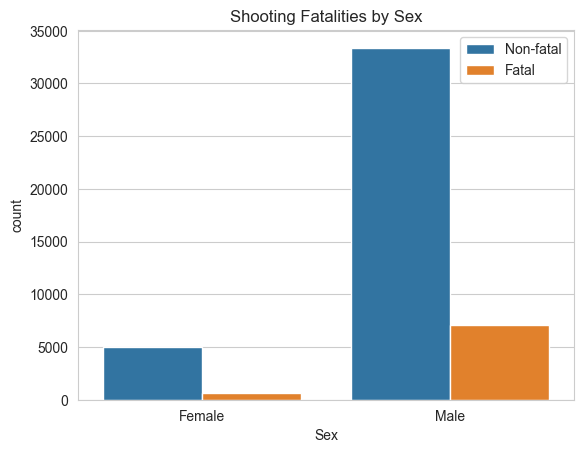

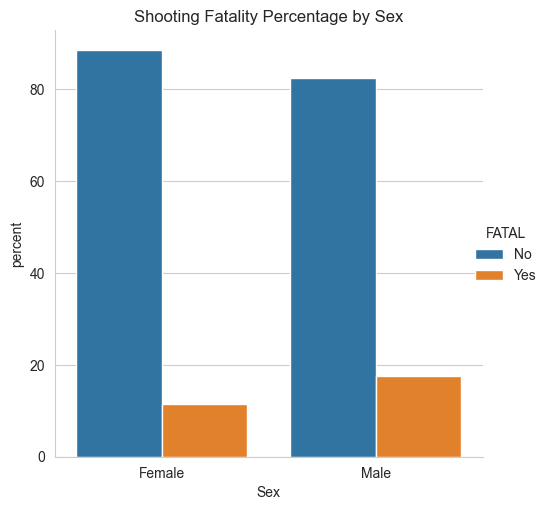

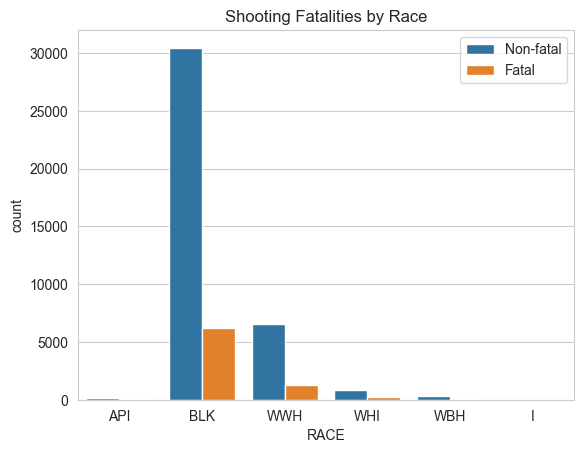

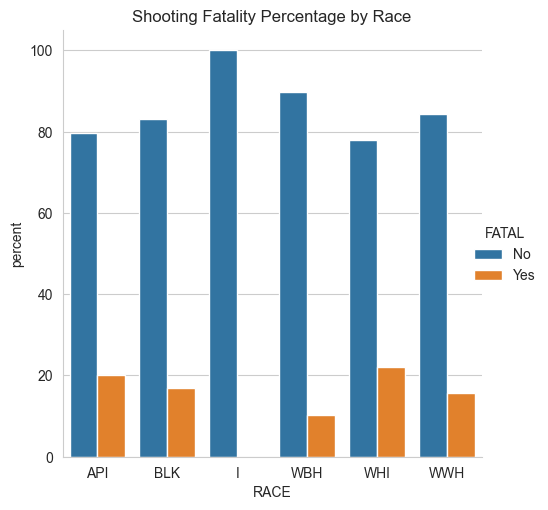

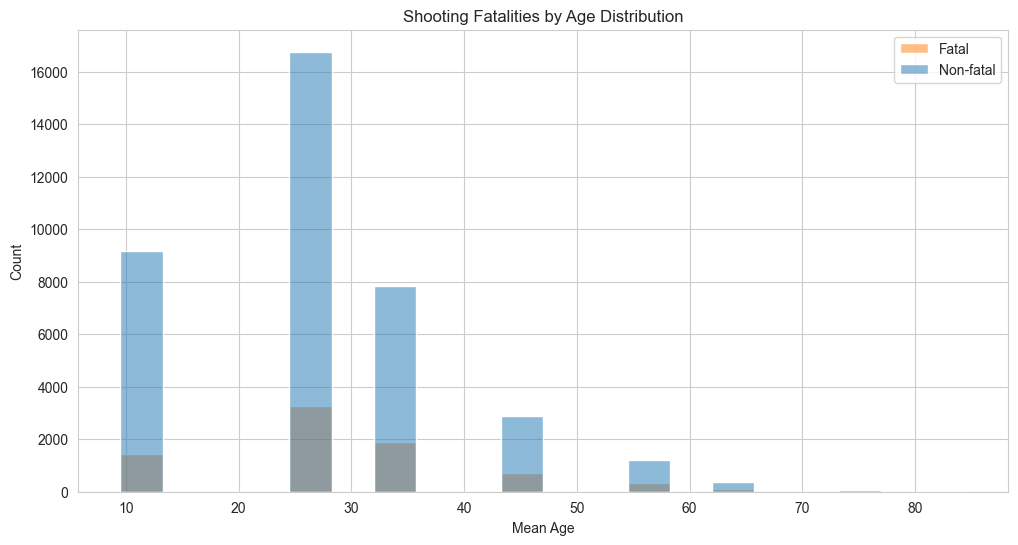

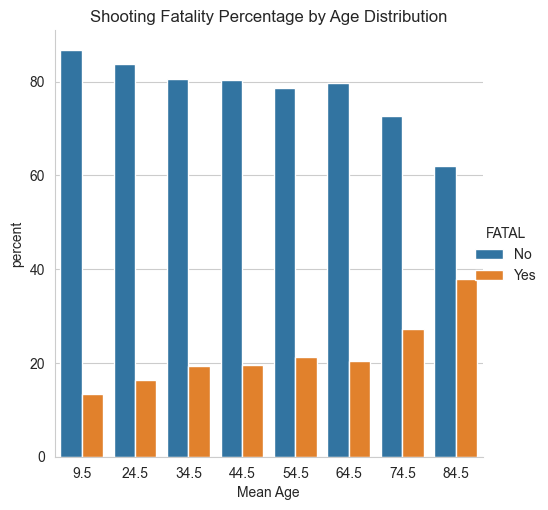

In [410]:
# plots by sex

sns.countplot(x=df['IS_MALE'], hue=df['FATAL'],)
plt.title("Shooting Fatalities by Sex")
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.legend(labels=['Non-fatal', 'Fatal'])
plt.show()

x,y = 'IS_MALE', 'FATAL'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

legend = g._legend

new_labels = ['No', 'Yes']

for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
plt.title("Shooting Fatality Percentage by Sex")
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.show()

# plots by race

sns.countplot(x=df['RACE'], hue=df['FATAL'],)
plt.title("Shooting Fatalities by Race")
plt.legend(labels=['Non-fatal', 'Fatal'])
plt.show()


x,y = 'RACE', 'FATAL'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

legend = g._legend

new_labels = ['No', 'Yes']

for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
plt.title("Shooting Fatality Percentage by Race")
plt.show()


# plot by age

plt.figure(figsize=(12, 6))
plt.title("Shooting Fatalities by Age Distribution")
sns.histplot(x=df['AGE_MEAN'], hue=df['FATAL'], bins=20)
plt.legend(labels=['Fatal', 'Non-fatal'])
plt.xlabel('Mean Age')
plt.show()



x,y = 'AGE_MEAN', 'FATAL'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
legend = g._legend
new_labels = ['No', 'Yes']
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
plt.title("Shooting Fatality Percentage by Age Distribution")
plt.xlabel('Mean Age')
plt.show()





# df_normalized = df.groupby('RACE').size().div(len(df)).mul(100).rename('percent').reset_index()


# sns.catplot(x='RACE', y='percent', kind='bar', data=df_normalized)
# plt.show()




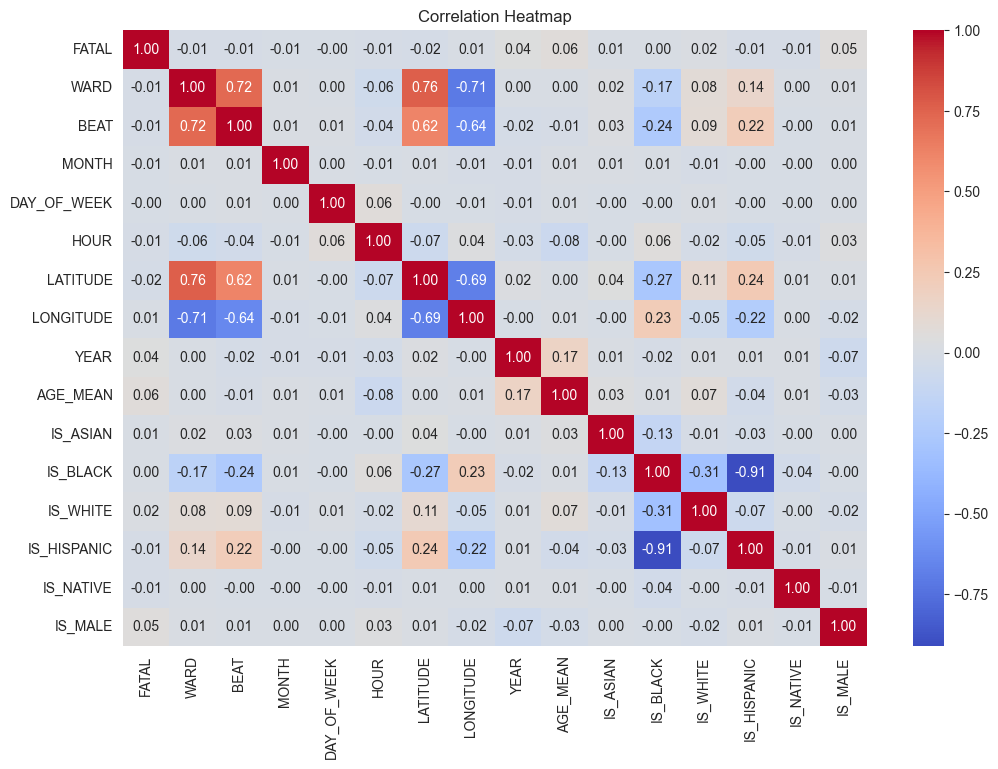

In [411]:
# have to drop categorical RACE column for correlation matrix

df_cleaned = df.drop(columns=['RACE'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [412]:
# sns.pairplot(df, diag_kind='kde', vars=['FATAL', 'WARD', 'BEAT', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'YEAR', 'AGE_MEAN', 'IS_ASIAN', 'IS_BLACK', 'IS_WHITE', 'IS_HISPANIC', 'IS_NATIVE', 'IS_MALE'])


The results of my EDA suggest that building a good classifier model may be tough. The only features with even slightly significant correlations to FATALITY are IS_MALE, IS_WHITE, AGE_MEAN and YEAR.

A couple of surprises for me:

1. While location, as captured by WARD and LATITUDE/LONGITUDE, is modestly correlated to the race features (which makes sense in a historically segregated city like Chicago), it does not seem to be correlated to fatality. 

2. There is some interesting coorelation between YEAR and AGE_MEAN, meaning there must have been years when it was unlucky to be a particular age.

Given that I have a lot of samples (~46k) but complex relationships between the features, I am going to investigate the non-parametric models KNN, AdaBoost and SVM.

I will now separate the training and testing data.

In [ ]:
feature_names = list(df_cleaned.columns.values)
X = df_cleaned.drop('FATAL', axis=1)
y = df_cleaned['FATAL']

X_array = X.to_numpy()
y_array = y.to_numpy()

    
X_train, X_test, y_train, y_test = train_test_split(X_array,y_array, test_size=0.1)

### MODELS, RESULTS AND ANALYSIS

#### KNN

I will start by trying out a K-nearest neighbors model, testing with an arbitary hyperparameter K value of 5 just to look at the confusion matrix and get a ballpark of model accuracy.

In [442]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

val_yhat = knn.predict(X_test)

sklearn.metrics.confusion_matrix(y_test, val_yhat)



array([[3686,  153],
       [ 736,   36]])

In [443]:
accuracy = accuracy_score(y_test, val_yhat)
print(accuracy)

0.8072001734981565


That's decent but I want to see if I can find tune the hyperparameter K to give me a better accuracy. I will test Ks up to 20 while doing a 5-fold cross-validation.

k=1, accuracy=0.715
k=2, accuracy=0.810
k=3, accuracy=0.777
k=4, accuracy=0.818
k=5, accuracy=0.803
k=6, accuracy=0.823
k=7, accuracy=0.815
k=8, accuracy=0.826
k=9, accuracy=0.821
k=10, accuracy=0.828
k=11, accuracy=0.825
k=12, accuracy=0.829
k=13, accuracy=0.828
k=14, accuracy=0.830
k=15, accuracy=0.829
k=16, accuracy=0.831
k=17, accuracy=0.830
k=18, accuracy=0.831
k=19, accuracy=0.831
k=20, accuracy=0.832


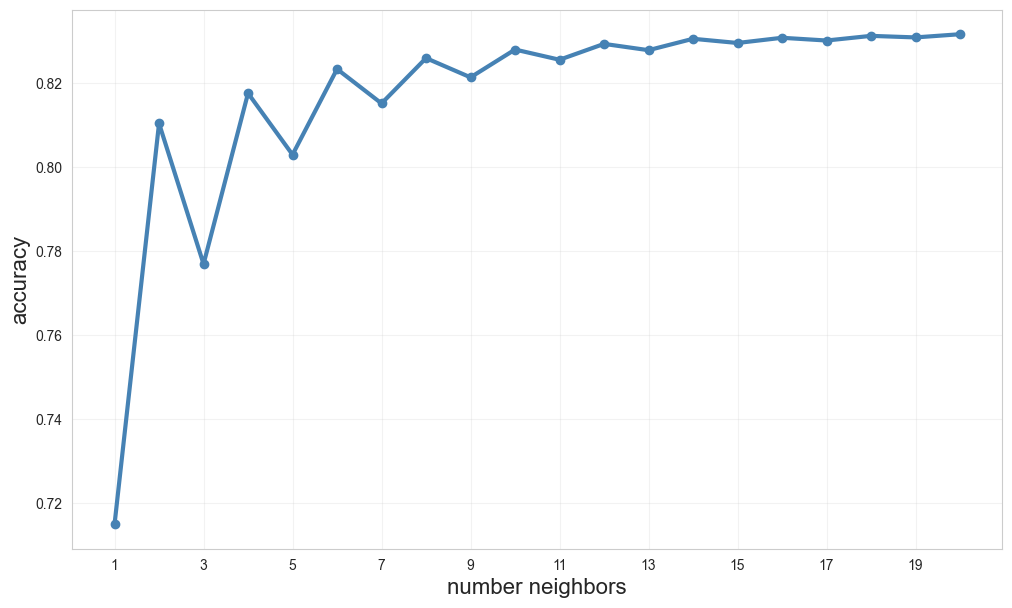

In [447]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()

acc = []
wacc = []
allks = range(1,21)

for k in allks:
    knn.n_neighbors = k
    scores = cross_val_score(knn, X_array, y_array, cv=5)
    accuracy = scores.mean()
    acc.append(accuracy)
    print(f"k={k}, accuracy={accuracy:.3f}")

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.xticks(range(1,21,2))
ax.grid(alpha=0.25)


That's a pretty decent model, looking very stable at k=12 but already performing pretty well at k=6.

Now that I have a baseline accuracy from my KNN model, I want to also look at the accuracy of classifier models based on AdaBoost and a Support Vector Machine.

#### ADABOOST

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X_array,y_array, test_size=0.3)

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=300)

ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", accuracy_ada)

Accuracy: 0.8314777327935222


That accuracy is not significantly different from what I got with KNN.

I started out with a large number of AdaBoost estimators, but now I want to see if I can improve the accuracy by tuning the number.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier()

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300]}

grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_array, y_array)

best_n_estimators = grid_search.best_params_['n_estimators'] 

print("Best score:", grid_search.best_score_)

Best score: 0.8320175245180097


In [472]:
print("Best # estimators:", best_n_estimators)

Best # estimators: 50


So with 50 AdaBoost estimators, I do not much better.

Now I'll try SVM — though I know it's not great for large datasets.

#### SUPPORT VECTOR MACHINE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_array,y_array, test_size=0.3)

from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")

Accuracy: 0.8255494505494505


#### FINDING THE SIGNIFICANT FEATURES

All three classifier models seem to max out around 0.83 accuracy.

My accuracy with SVM was slightly worse than with the other two models, and it took much longer to run (unsurprising, given that SVM is known to be poor with large datasets). In fact, when I tried to do an automated tuning of the SVM model for C and gamma, the process was taking so long that I just killed it. So SVM gets ruled out as an efficient model.

Given that KNN performed faster than AdaBoost, and the fact that AdaBoost is more prone to overfitting, my preference is to choose the KNN model.


Going back to the KNN model, now I want to check the feature importance and compare it to my intuitions from my original correlation matrix.

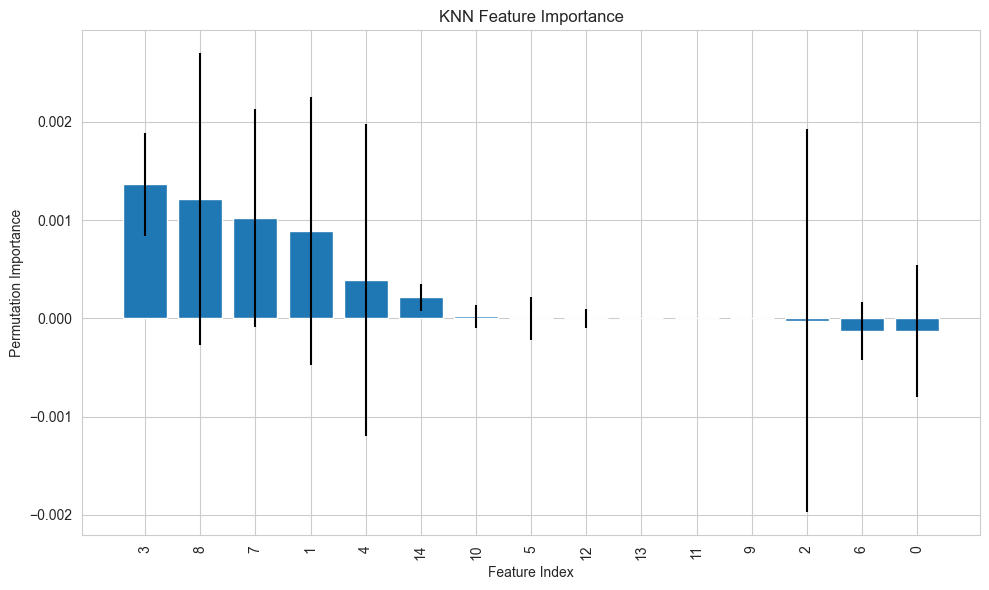

Feature 3 - DAY_OF_WEEK: 0.001 +/- 0.001
Feature 8 - AGE_MEAN: 0.001 +/- 0.001
Feature 7 - YEAR: 0.001 +/- 0.001
Feature 1 - BEAT: 0.001 +/- 0.001
Feature 4 - HOUR: 0.000 +/- 0.002
Feature 14 - IS_MALE: 0.000 +/- 0.000
Feature 10 - IS_BLACK: 0.000 +/- 0.000
Feature 5 - LATITUDE: 0.000 +/- 0.000
Feature 12 - IS_HISPANIC: 0.000 +/- 0.000
Feature 13 - IS_NATIVE: 0.000 +/- 0.000
Feature 11 - IS_WHITE: 0.000 +/- 0.000
Feature 9 - IS_ASIAN: 0.000 +/- 0.000
Feature 2 - MONTH: -0.000 +/- 0.002
Feature 6 - LONGITUDE: -0.000 +/- 0.000
Feature 0 - WARD: -0.000 +/- 0.001


In [476]:
X_train, X_test, y_train, y_test = train_test_split(X_array,y_array, test_size=0.1)

from sklearn.inspection import permutation_importance

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), result.importances_mean[sorted_idx], yerr=result.importances_std[sorted_idx])
plt.xticks(range(X.shape[1]), sorted_idx, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Permutation Importance")
plt.title("KNN Feature Importance")
plt.tight_layout()
plt.show()

for i in sorted_idx:
        print(f"Feature {i} - {feature_names[i+1]}: {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

To recall, my orginal correlation matrix highlighted the features IS_MALE, IS_WHITE, AGE_MEAN and YEAR.

In my KNN model, however, the sex and race features appear to be entirely irrelevant, and DAY_OF_WEEK and BEAT make a reasonable showing.

Since there's no good way to plot a 15-dimensional decision boundary, I will have to forgo a visualization of the classifier.

### DISCUSSION AND CONCLUSION


#### Learnings and takeaways

When I first saw the correlation matrix, I was was surprised by the low correlations. The shootings vs. fatalities plots told a clear story of "who" got shot, but were much murkier about who ended up dying. I has assumed that demographics would be significant. They mostly were not.

The exception is age. From both the matrix and the model, age appears to be a positive predictor of shooting fatality — which makes sense, since young people are more likely to recover from any kind of trauma.

Another surprise for me was that latitude and logitude of a shooting — which is to say, its exact map location — had no predictive value. I had assumed that shooting death likelihood would tend to increase in particualr spots, and it did not. What DID make a difference was the particular police beat. This suggests to me that the emergency services associated with particular police stations do a worse job of responding to shootings than others. While BEAT is a categorical feature, the highest numbered beats in Chicago coincidentally coincide with some of the most dangerous parts of the city.

Year and day of week were also positive predictors of fatality. In the case of day of week, it would seem that the end of week — Friday and Saturday — would be the worst days to get shot. The positive correlation with year is more unsettling, because it suggests that the liekihood of dying from a gunshot is RISING over time.


#### What didn't work

I find it hard to believe that age is the only predictive demographic feature for fatality. Especially because race is correlated with location, which IS (at least in terms of police beat) predictive of fatality. Not to mention the fact that sex was correlated with fatality in my correlation matrix.

Likewise,outside of the predictive value of police beat, I missed out on getting a good predictive "location" feature. Since BEAT was naturally correlated with other location-related features, I think there's a high likelihood there's a good feature I missed, or that would have shown up in another model.


#### What could be improved

0.83 isn't terrible for model accuracy, but I might have left something on the table.

Given a lot more time, I think I would painstakingly go through every single demographic and location feature, and explore other models that best brought out the predictive quality of these types of features. Specifically, I find it hard to accept that sex showed itself to be correlated in EDA but then disappeared in the model.

I would also find another way to treat the "months" feature — maybe along a winter-summer axis, since Chicago tends to be most violent in the summer months, when its warm. If possible, I would like to bring in weather data for the specific day of the shooting.

And even though it looked like a beast, I would like to try to make something of the "location description" feature that I dropped before making my models. I could maybe convert it into a binary public space vs. private space feature, at the least.


#### Final thoughts

Did I learn anything useful? At the core, I discovered that where and when you were when you got shot matter a lot more in terms of survivability than who you are — unless you're old. 

So is there anything we can do to make shootings more survivable?

The relevance of police beat suggests to me that there are some emergency services units that are underperforming others. This could be because ambualnces are not getting called, or there aren't enough ambulances in a particular area, or the EMTs on those ambulances aren't as capable. Or it could mean that quality hospital trauma departments are too far away. 

The chronological features are murkier. It's clear that we're either underperforming in keeping people alive toward the end of the week, or shooters are doing a lot better job at killing them. We'd need more data, such as number of shots fired, to make any kind of guess here. But a clear and disturbing trend is that with the passage of years, fatality percentages are getting worse. So this is not a problem we can ignore.